In [44]:
Business Requirment-
    identifying the target market to increase the sales and use the resources effectively and efficiently resulting in maximizing the profits and minimizing the losses.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


In [46]:
df = pd.read_csv("Downloads\mcdonalds.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


In [5]:
print(df.describe())

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [4]:
print(df.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [9]:
print(df['Gender'].value_counts())

Female    788
Male      665
Name: Gender, dtype: int64


In [17]:
print(df['VisitFrequency'].value_counts())

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64


In [18]:
binary_cols = df.columns[(df == 'Yes').any()]
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

In [19]:
label_enc = LabelEncoder()
df['Like'] = label_enc.fit_transform(df['Like'])
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['VisitFrequency'] = label_enc.fit_transform(df['VisitFrequency'])

In [20]:
label_enc = LabelEncoder()
df['Like'] = label_enc.fit_transform(df['Like'])
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['VisitFrequency'] = label_enc.fit_transform(df['VisitFrequency'])


In [21]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

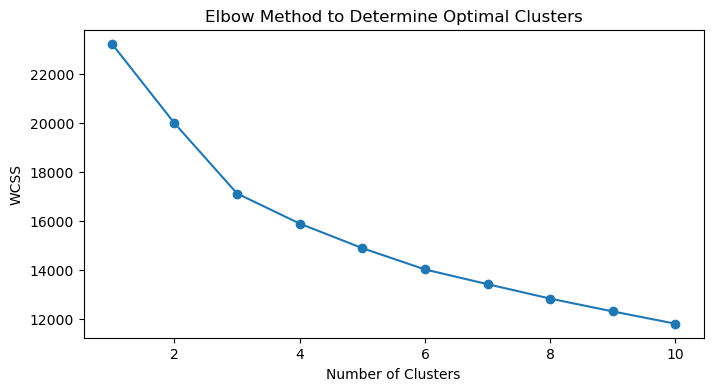

In [23]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)
df['Cluster'] = clusters

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [25]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

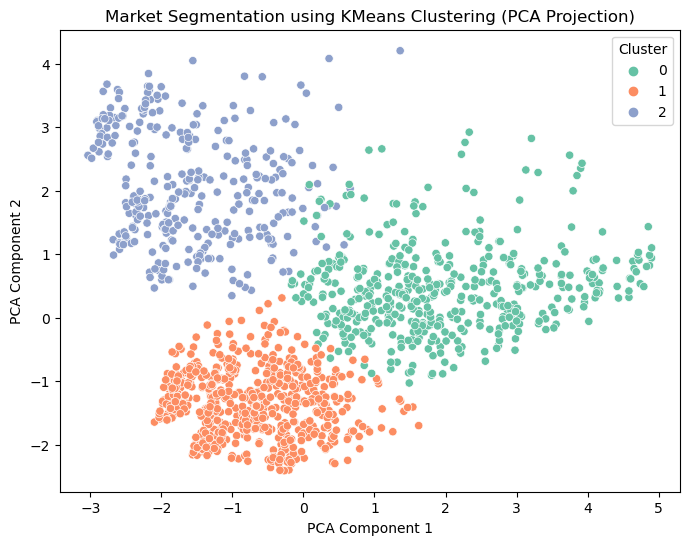

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set2')
plt.title("Market Segmentation using KMeans Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [27]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile.T)

Cluster                 0          1          2
yummy            0.028513   0.819315   0.821875
convenient       0.765784   0.982866   0.975000
spicy            0.087576   0.071651   0.146875
fattening        0.932790   0.990654   0.518750
greasy           0.696538   0.540498   0.237500
fast             0.828921   0.942368   0.925000
cheap            0.468432   0.630841   0.734375
tasty            0.097760   0.936137   0.896875
expensive        0.470468   0.319315   0.262500
healthy          0.032587   0.003115   0.846875
disgusting       0.584521   0.073209   0.059375
Like             6.600815   3.330218   4.243750
Age             49.177189  40.506231  45.812500
VisitFrequency   2.694501   2.638629   2.550000
Gender           0.488798   0.451713   0.421875


In [28]:
df_numeric = df.select_dtypes(include=[np.number])

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

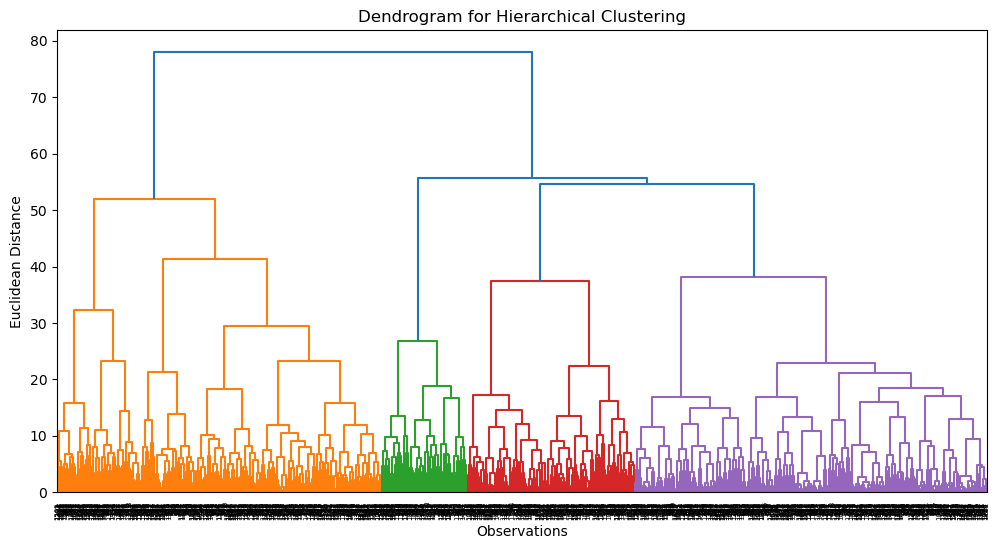

In [30]:
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(scaled_data, method='ward')
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Euclidean Distance")
plt.show()

In [31]:
correlation_matrix = df.corr(numeric_only=True)

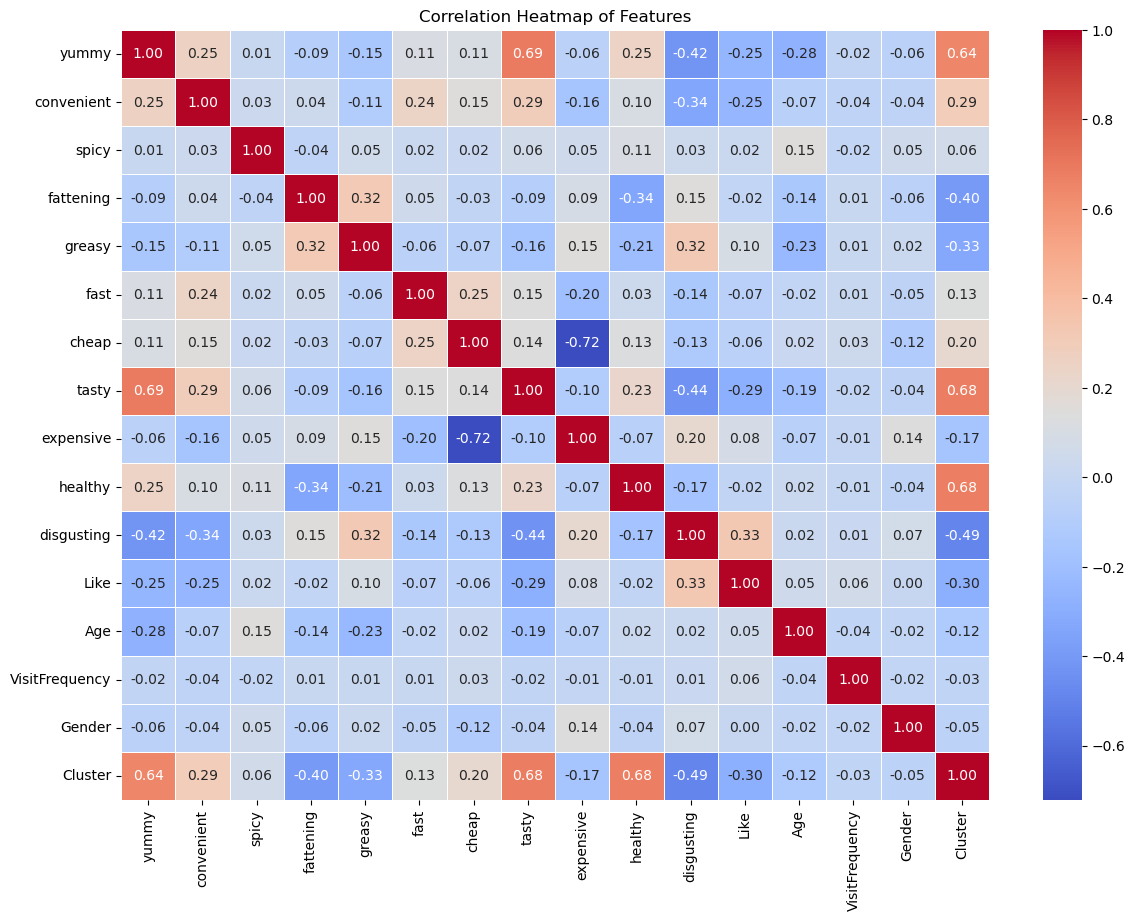

In [32]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

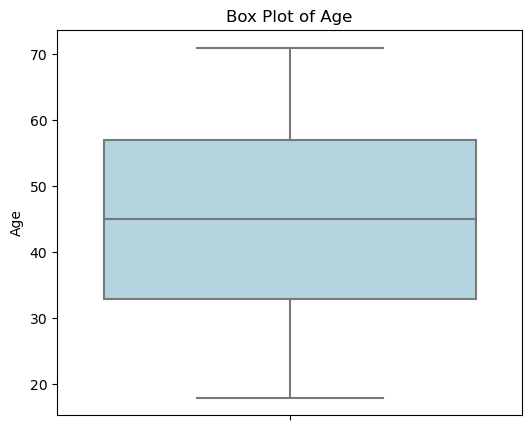

In [33]:
# Basic boxplot of 'Age'
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Age'], color='lightblue')
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()


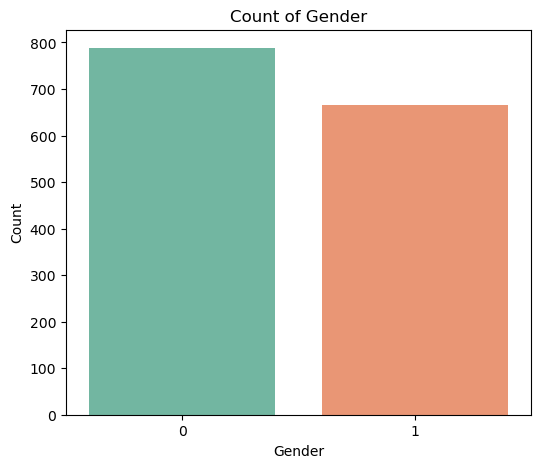

In [34]:
# Count of Gender
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Count of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [39]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = hc.fit_predict(scaled_data)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


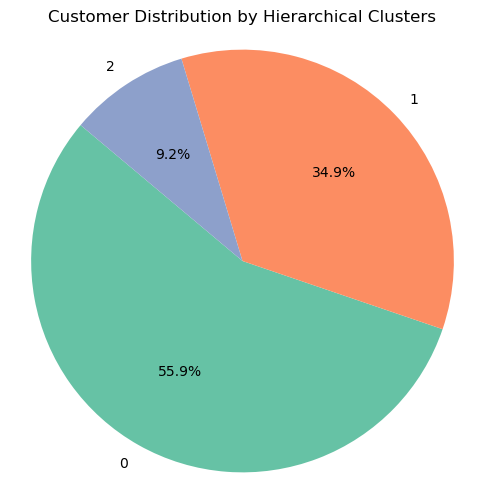

In [40]:
# Pie chart for cluster distribution
cluster_counts = df['Cluster_Hierarchical'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Customer Distribution by Hierarchical Clusters')
plt.axis('equal')
plt.show()


In [42]:
feature_cols = df.select_dtypes(include='number').columns.drop('Cluster_Hierarchical')

Cluster_profile = df.groupby('Cluster_Hierarchical')[feature_cols].mean().T


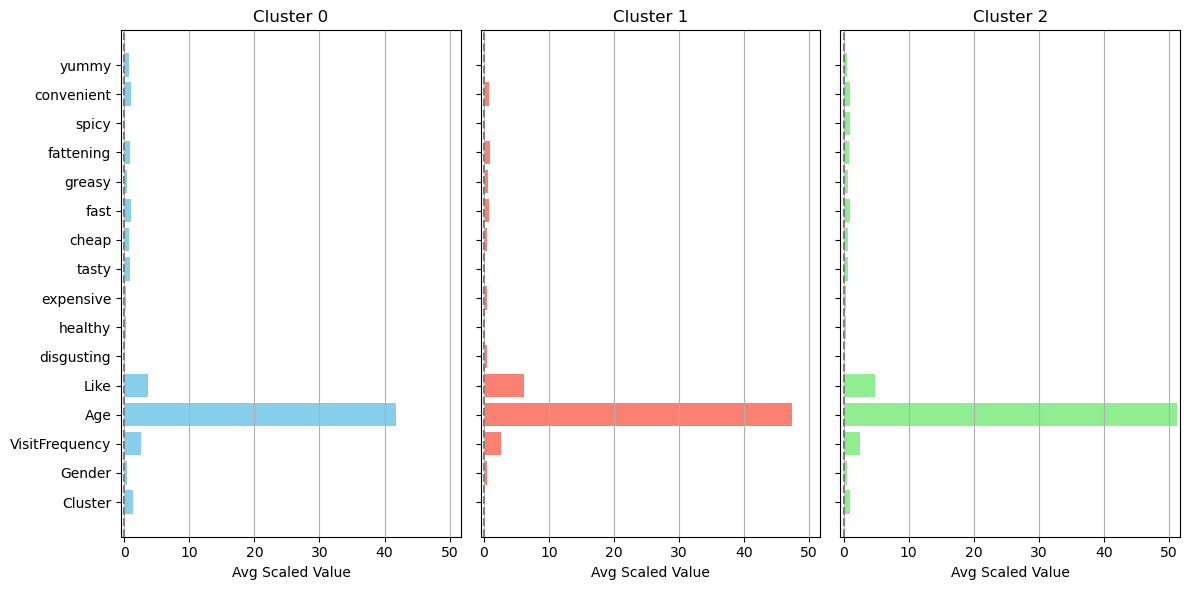

In [43]:
features = Cluster_profile.index
colors = ['skyblue', 'salmon', 'lightgreen', 'plum']  # Adjust if more clusters

fig, axes = plt.subplots(nrows=1, ncols=Cluster_profile.shape[1], figsize=(4 * Cluster_profile.shape[1], 6), sharey=True)

# Handle case of only one cluster
if Cluster_profile.shape[1] == 1:
    axes = [axes]

for i, cluster in enumerate(Cluster_profile.columns):
    ax = axes[i]
    ax.barh(features, Cluster_profile[cluster], color=colors[i % len(colors)])
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Avg Scaled Value')
    ax.axvline(x=0, color='gray', linestyle='--')  # Reference line
    ax.grid(True, axis='x')
    ax.set_xlim(Cluster_profile.min().min() - 0.5, Cluster_profile.max().max() + 0.5)
    ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
Cluster 0 – Convenience-Seeking Health-Conscious Women

Demographics: Primarily females under the age of 44
Behavior: Frequent visitors
Perceptions: View McDonald’s as convenient, tasty, affordable, and even healthy
Targeting Strategy:
    Highlight friendly service, healthier meal options, and affordability
    Reinforce the convenience factor
    This group is already loyal and can be preserved through continued engagement
Primary target segment for promotions and personalized marketing

Cluster 1 – Frugal but Health-Conscious Critics

Demographics: Mostly individuals over 44 years of age
Behavior: Among the least frequent visitors
Perceptions :
    McDonald’s is affordable, but
    Untasty, unhealthy, and lacking in food quality
Targeting Strategy:
    Focus on menu transparency, cleaner and healthier options, and ingredient quality
    Possibly highlight nutritional upgrades or collaborations with dieticians
    May be difficult to convert, unless significant improvements in health branding are made

Cluster 2 –Busy Young Skeptics
Demographics: Mostly males under 44
Behavior: Visit frequently
Perceptions:
    Food is expensive, and service is slow
Targeting Strategy:
    Emphasize fast service, value deals, and quick-order options (e.g., app, self-kiosks)
    Speed and affordability can address their key concerns
Secondary target segment due to high frequency but low satisfaction

Cluster 3 – Disengaged Older Critics
Demographics: Mostly males over 44
Behavior: Infrequent visitors
Perceptions:
    McDonald’s is inconvenient, unhealthy, expensive, and disgusting
Targeting Strategy:
    Likely not worth focusing on for immediate marketing campaigns
    Could require major brand reputation repair or menu overhaul
    Consider excluding from primary targeting efforts
